In [1]:
#importing req. Lib.
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from wordcloud import WordCloud

In [2]:
data = pd.read_csv('datasetPython.csv')

In [3]:
#data.head()
data.columns
data.info()

# data.nunique()

# data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40102 entries, 0 to 40101
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       40102 non-null  int64  
 1   Language                 40102 non-null  object 
 2   Subscription Type        40102 non-null  object 
 3   Subscription Event Type  40102 non-null  object 
 4   Purchase Store           40102 non-null  object 
 5   Purchase Amount          25294 non-null  float64
 6   Currency                 26924 non-null  object 
 7   Subscription Start Date  40102 non-null  object 
 8   Subscription Expiration  40102 non-null  object 
 9   Demo User                40102 non-null  object 
 10  Free Trial User          40102 non-null  object 
 11  Free Trial Start Date    5833 non-null   object 
 12  Free Trial Expiration    5833 non-null   object 
 13  Auto Renew               40101 non-null  object 
 14  Country               

In [ ]:
# data.isnull().sum().plot(kind='bar')

In [4]:
# Converting the dates to datetime format for further analysis
data[['Subscription Start Date', 'Subscription Expiration', 'Free Trial Start Date', 'Free Trial Expiration', 'Sub Start Date Out', 'Sub Expiration Date Out']] = data[['Subscription Start Date', 'Subscription Expiration', 'Free Trial Start Date', 'Free Trial Expiration', 'Sub Start Date Out', 'Sub Expiration Date Out']].astype('datetime64[ns]')

In [5]:
# Double checking that conversion of type worked. It did
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40102 entries, 0 to 40101
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       40102 non-null  int64         
 1   Language                 40102 non-null  object        
 2   Subscription Type        40102 non-null  object        
 3   Subscription Event Type  40102 non-null  object        
 4   Purchase Store           40102 non-null  object        
 5   Purchase Amount          25294 non-null  float64       
 6   Currency                 26924 non-null  object        
 7   Subscription Start Date  40102 non-null  datetime64[ns]
 8   Subscription Expiration  40102 non-null  datetime64[ns]
 9   Demo User                40102 non-null  object        
 10  Free Trial User          40102 non-null  object        
 11  Free Trial Start Date    5833 non-null   datetime64[ns]
 12  Free Trial Expiration    5833 no

In [6]:
# Convert data types to 1 and 0 for easier analysis
data['Demo User'] = data['Demo User'].map({'Yes': 1, 'No': 0})
data['Free Trial User'] = data['Free Trial User'].map({'Yes': 1, 'No': 0})
data['Auto Renew'] = data['Auto Renew'].map({'On': 1, 'Off': 0})
data['Email Subscriber'] = data['Email Subscriber'].map({'Yes': 1, 'No': 0})
data['Push Notifications'] = data['Push Notifications'].map({'Yes': 1, 'No': 0})

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40102 entries, 0 to 40101
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       40102 non-null  int64         
 1   Language                 40102 non-null  object        
 2   Subscription Type        40102 non-null  object        
 3   Subscription Event Type  40102 non-null  object        
 4   Purchase Store           40102 non-null  object        
 5   Purchase Amount          25294 non-null  float64       
 6   Currency                 26924 non-null  object        
 7   Subscription Start Date  40102 non-null  datetime64[ns]
 8   Subscription Expiration  40102 non-null  datetime64[ns]
 9   Demo User                40102 non-null  int64         
 10  Free Trial User          40102 non-null  int64         
 11  Free Trial Start Date    5833 non-null   datetime64[ns]
 12  Free Trial Expiration    5833 no

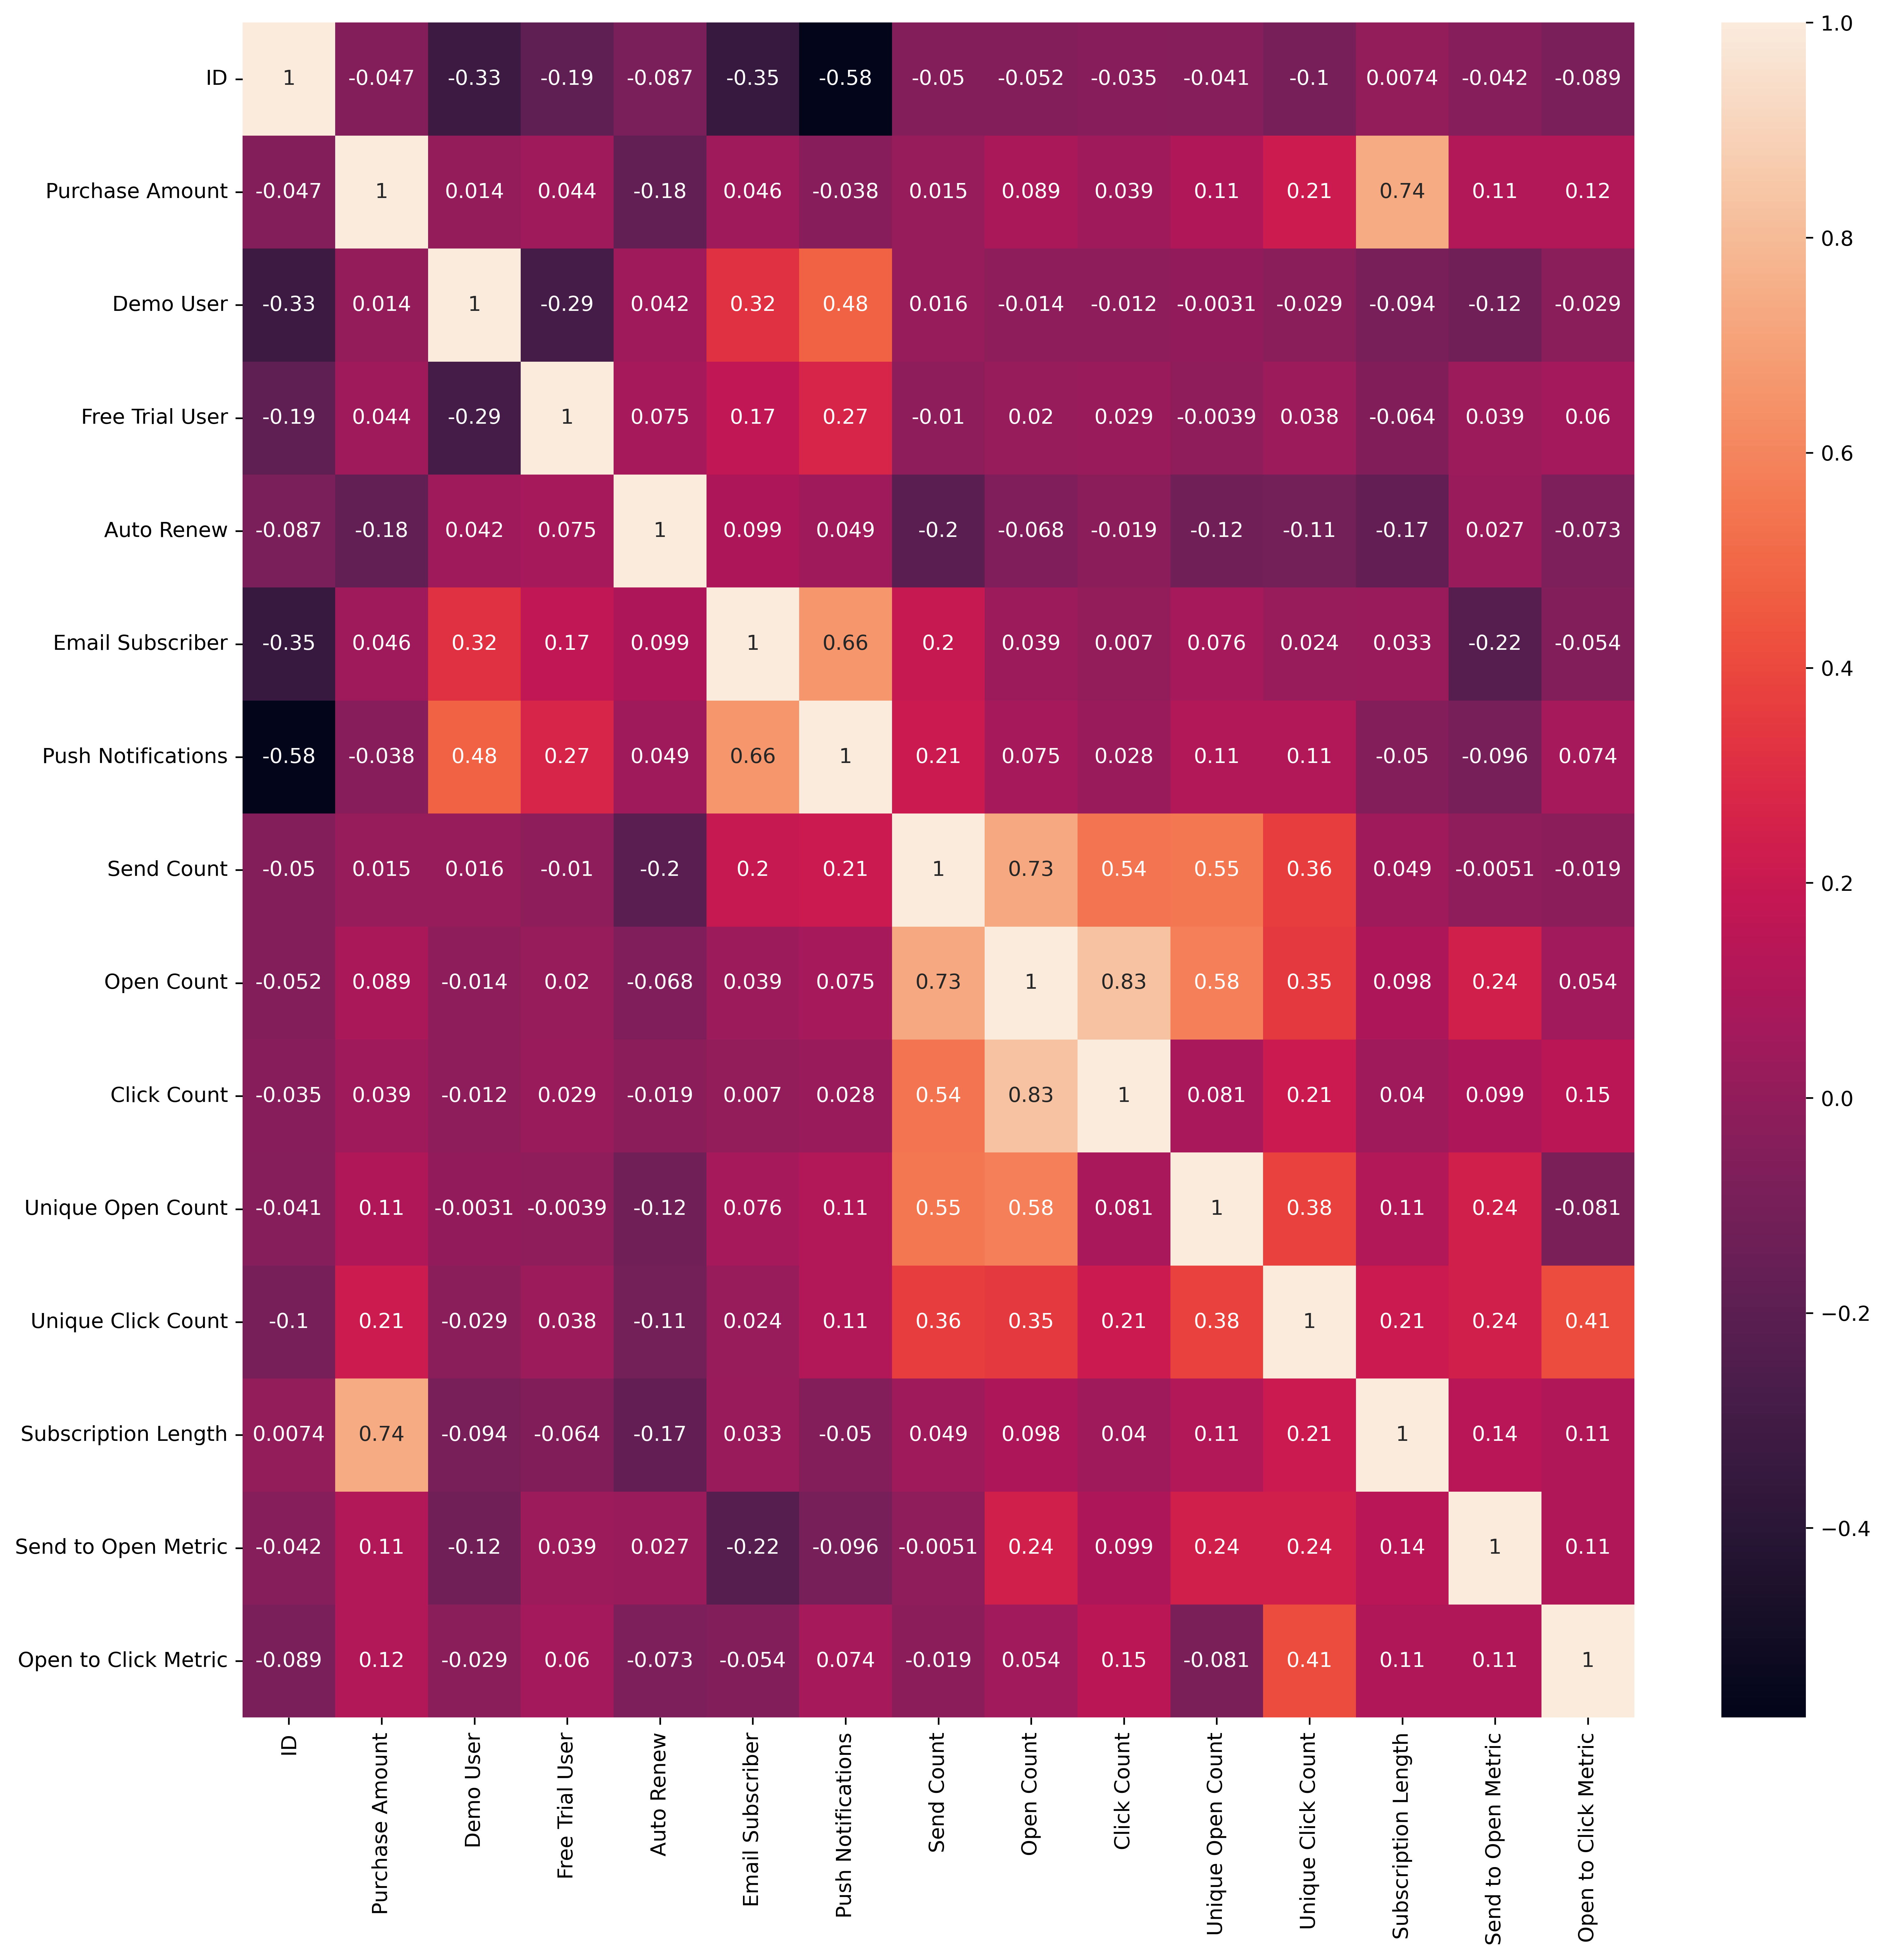

In [8]:
fig = plt.figure(figsize=(15, 15), dpi=480)
corr_matrix = data.corr()
# print(corr_matrix)
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [9]:
# # Converting more columns from dtype object to dtype category
data[['Language', 'Subscription Type', 'Subscription Event Type', 'Purchase Store', 'Currency', 'Country', 'User Type', 'Lead Platform',]] = data[['Language', 'Subscription Type', 'Subscription Event Type', 'Purchase Store', 'Currency', 'Country', 'User Type', 'Lead Platform']].astype('category')

In [10]:
# Double checking that conversion of type worked. It did!
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40102 entries, 0 to 40101
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       40102 non-null  int64         
 1   Language                 40102 non-null  category      
 2   Subscription Type        40102 non-null  category      
 3   Subscription Event Type  40102 non-null  category      
 4   Purchase Store           40102 non-null  category      
 5   Purchase Amount          25294 non-null  float64       
 6   Currency                 26924 non-null  category      
 7   Subscription Start Date  40102 non-null  datetime64[ns]
 8   Subscription Expiration  40102 non-null  datetime64[ns]
 9   Demo User                40102 non-null  int64         
 10  Free Trial User          40102 non-null  int64         
 11  Free Trial Start Date    5833 non-null   datetime64[ns]
 12  Free Trial Expiration    5833 no

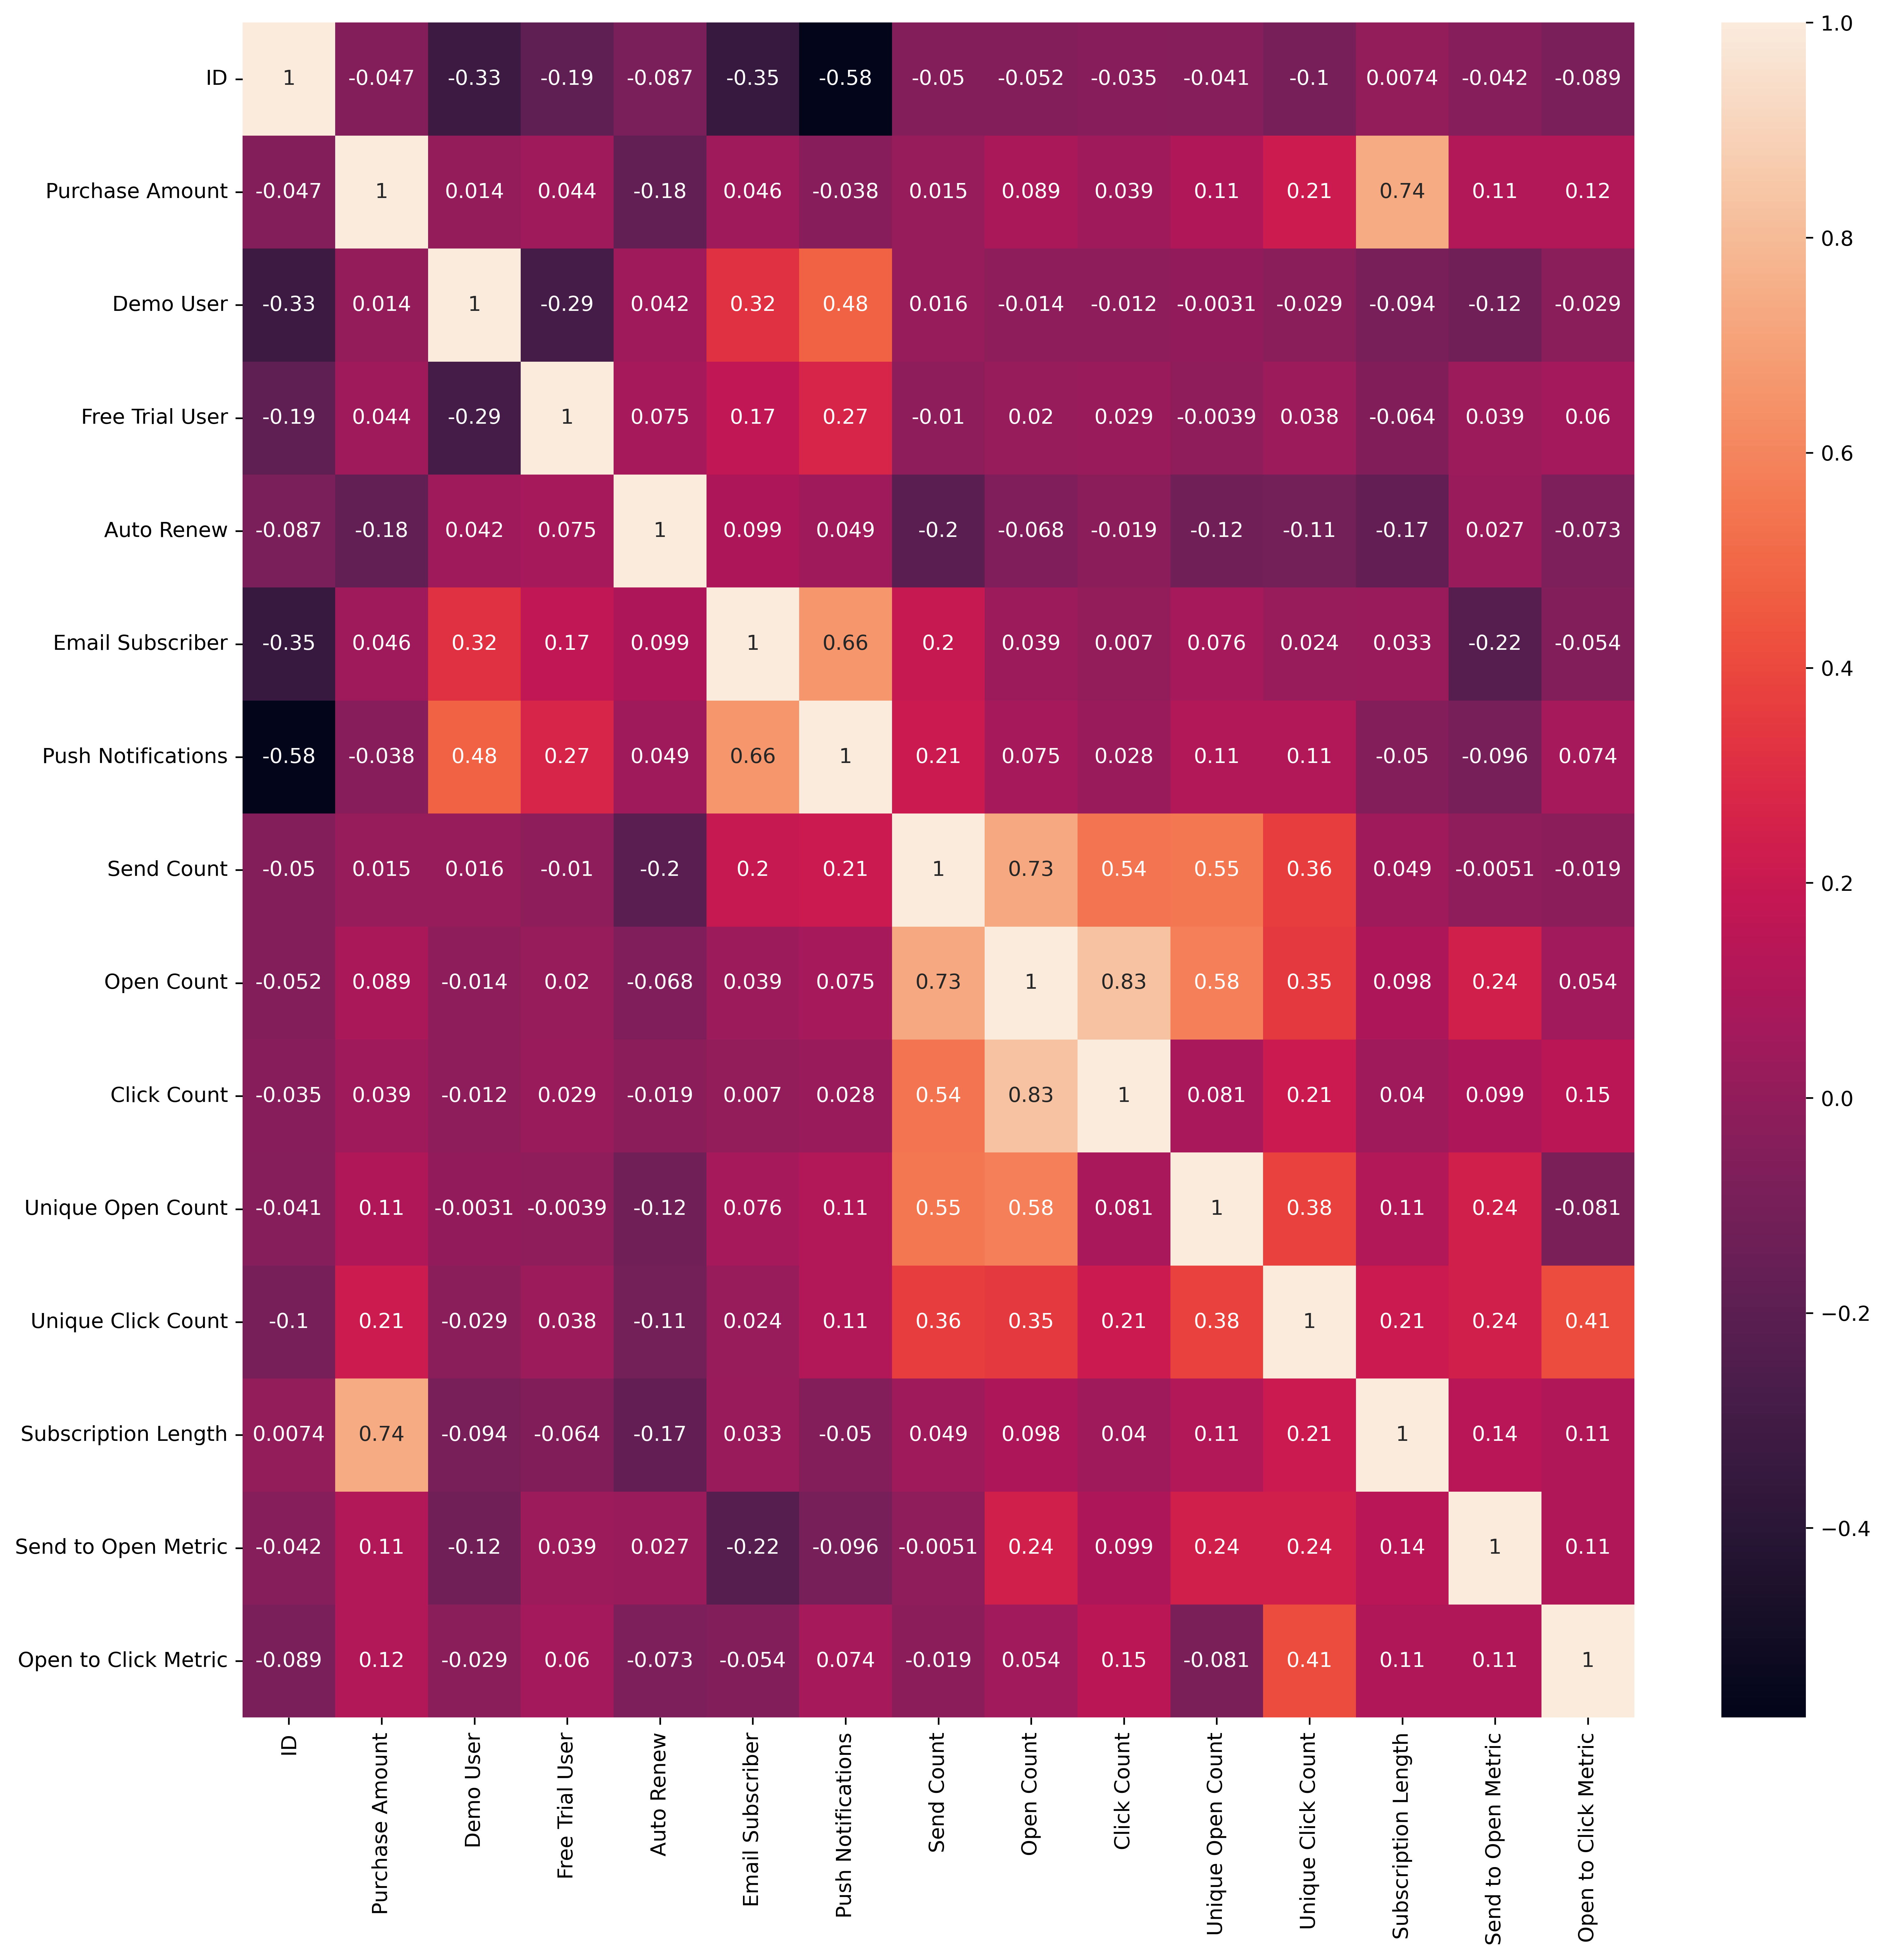

In [11]:
# New correlation matrix after converting columns to dtype category
fig = plt.figure(figsize=(15, 15), dpi=480)
corr_matrix = data.corr()
# print(corr_matrix)
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [12]:
# Time to drop our unnecessary columns
# We'll start with currency as the purchase amounts have all been converted to USD
data.drop('Currency', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40102 entries, 0 to 40101
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       40102 non-null  int64         
 1   Language                 40102 non-null  category      
 2   Subscription Type        40102 non-null  category      
 3   Subscription Event Type  40102 non-null  category      
 4   Purchase Store           40102 non-null  category      
 5   Purchase Amount          25294 non-null  float64       
 6   Subscription Start Date  40102 non-null  datetime64[ns]
 7   Subscription Expiration  40102 non-null  datetime64[ns]
 8   Demo User                40102 non-null  int64         
 9   Free Trial User          40102 non-null  int64         
 10  Free Trial Start Date    5833 non-null   datetime64[ns]
 11  Free Trial Expiration    5833 non-null   datetime64[ns]
 12  Auto Renew               40101 n

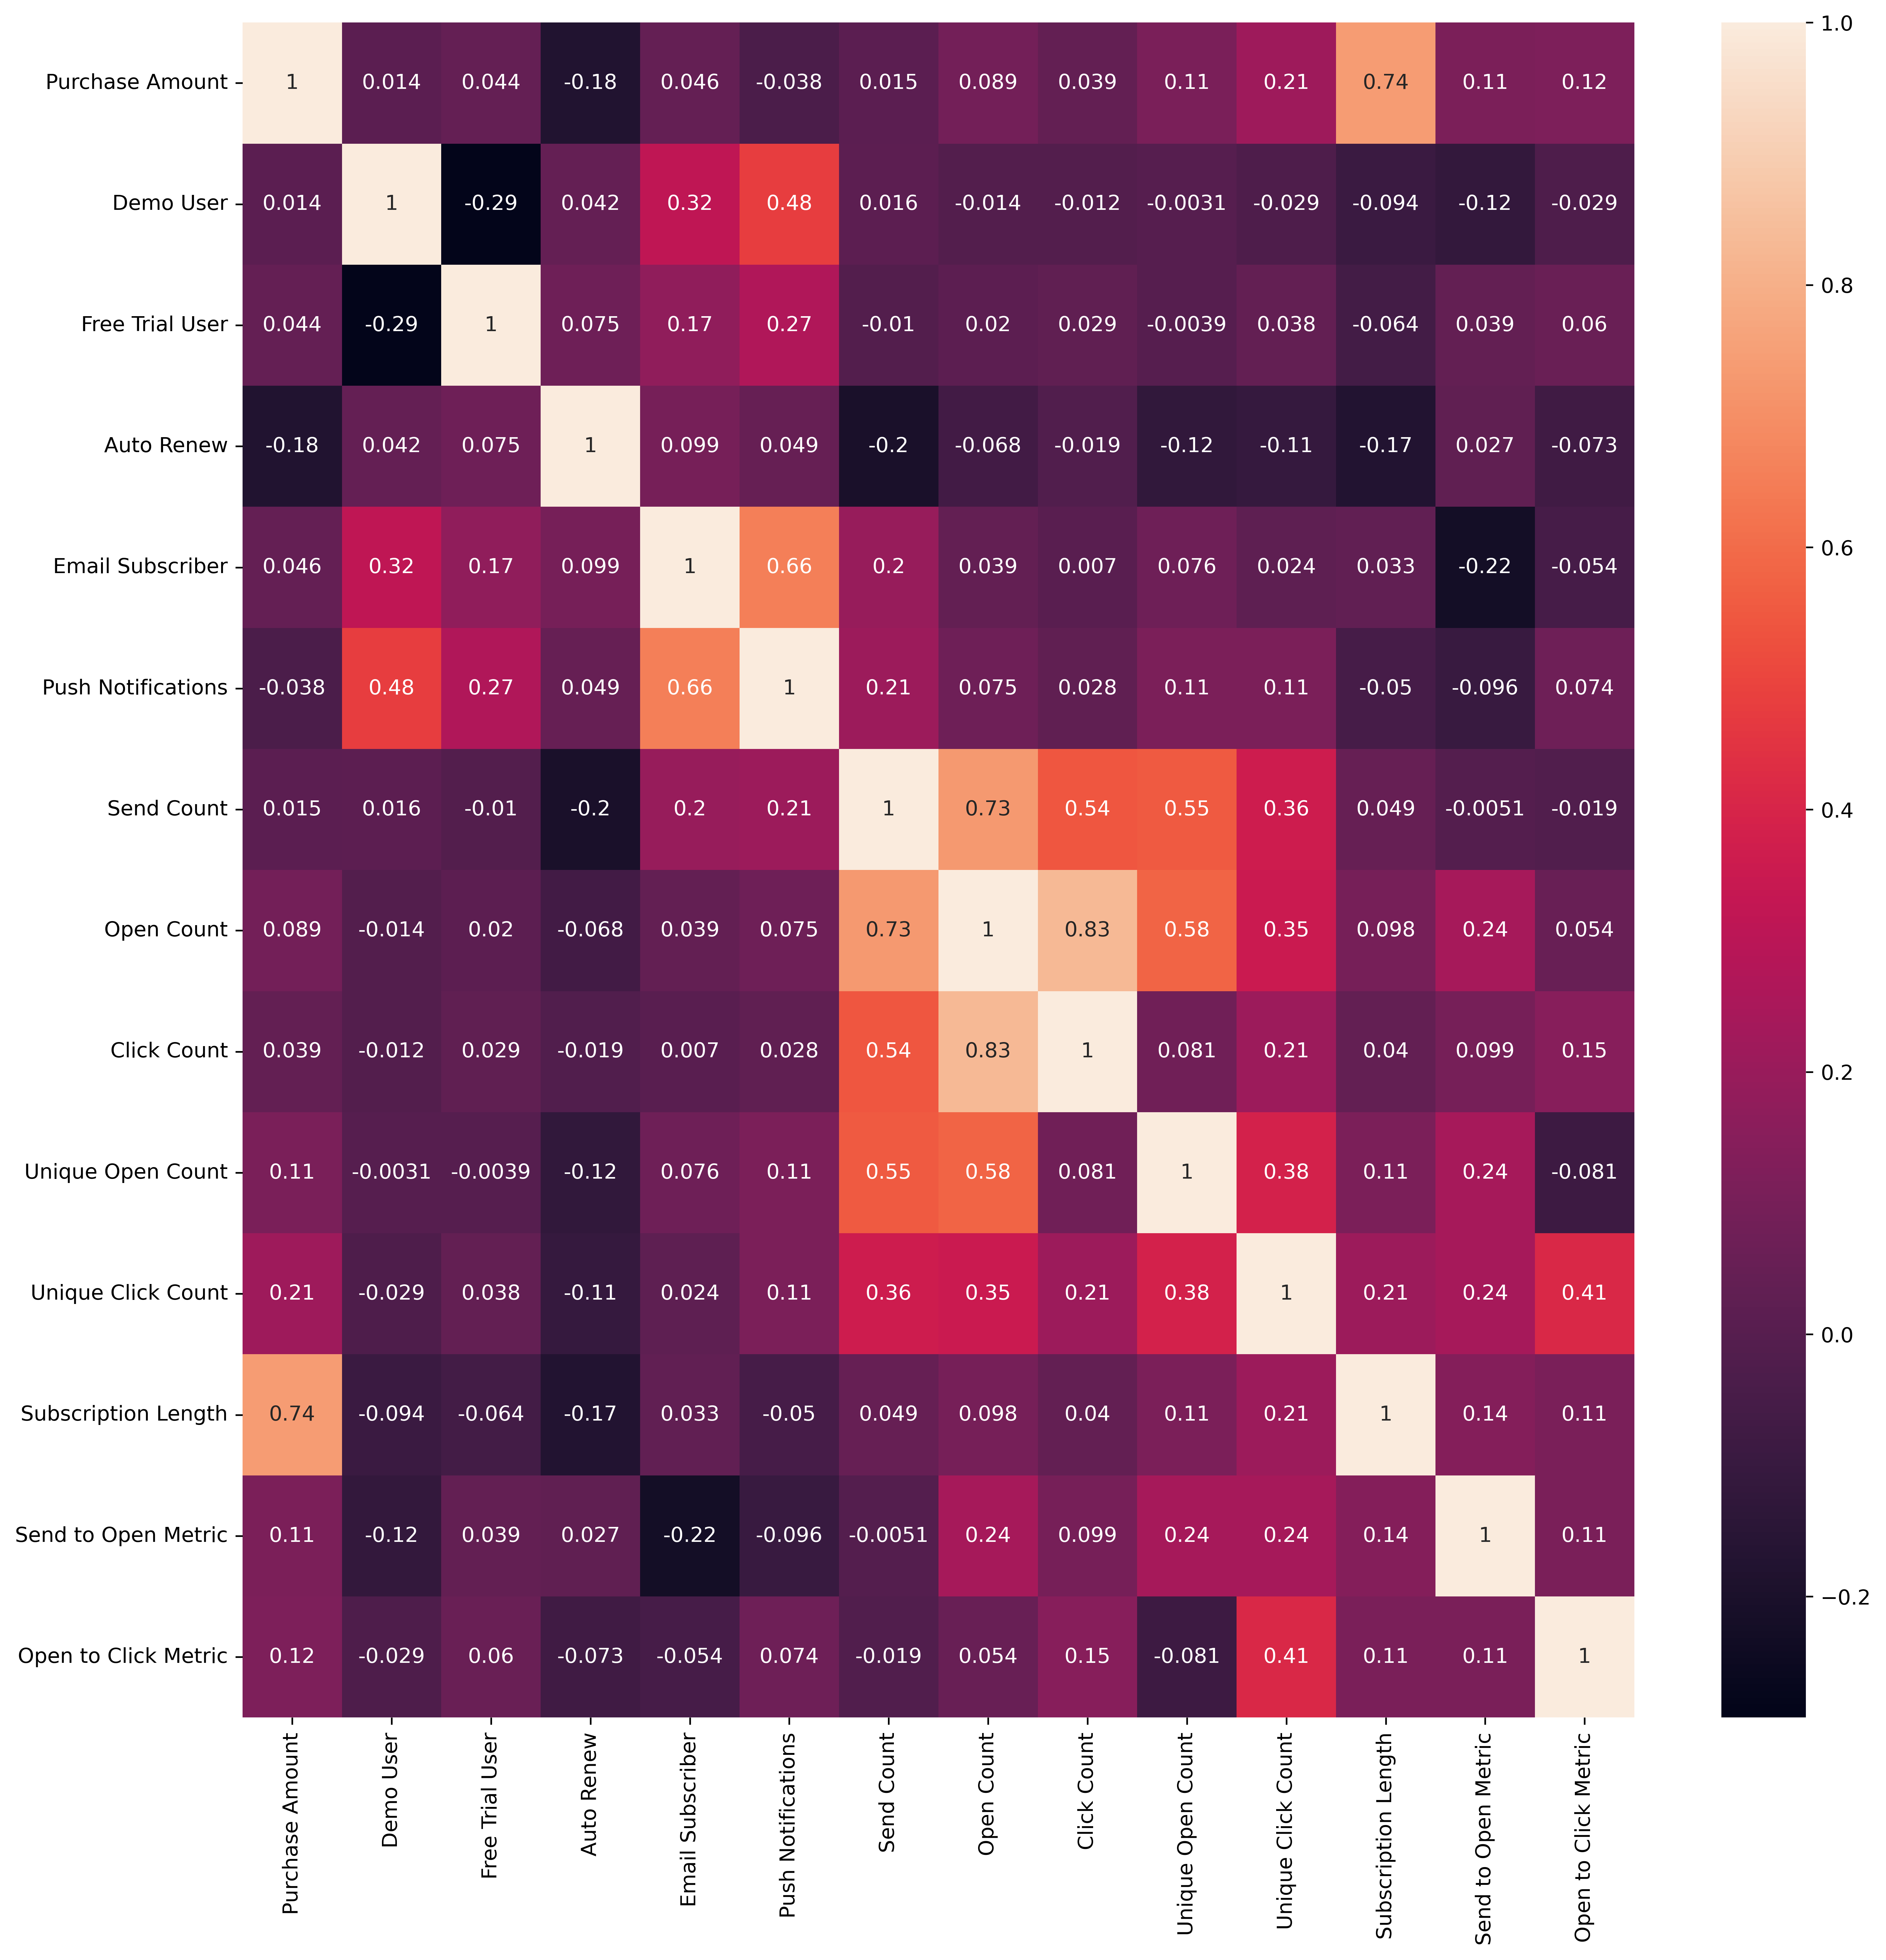

In [13]:
# updating the data frame to remove ID as we don't want it to impact our model and analysis
newData = data.drop('ID', axis=1)
# newData.info()

# New correlation matrix after dropping ID column
fig = plt.figure(figsize=(15, 15), dpi=480)
corr_matrix = newData.corr()
# print(corr_matrix)
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [14]:
dfDummies = pd.get_dummies(newData, columns=['Subscription Type', 'Subscription Event Type', 'Purchase Store', 'Country', 'User Type', 'Lead Platform'])
# dfDummies2 = pd.get_dummies(newData)

In [15]:
dfDummies.info()
# dfDummies2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40102 entries, 0 to 40101
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Language                                  40102 non-null  category      
 1   Purchase Amount                           25294 non-null  float64       
 2   Subscription Start Date                   40102 non-null  datetime64[ns]
 3   Subscription Expiration                   40102 non-null  datetime64[ns]
 4   Demo User                                 40102 non-null  int64         
 5   Free Trial User                           40102 non-null  int64         
 6   Free Trial Start Date                     5833 non-null   datetime64[ns]
 7   Free Trial Expiration                     5833 non-null   datetime64[ns]
 8   Auto Renew                                40101 non-null  float64       
 9   Email Subscriber            

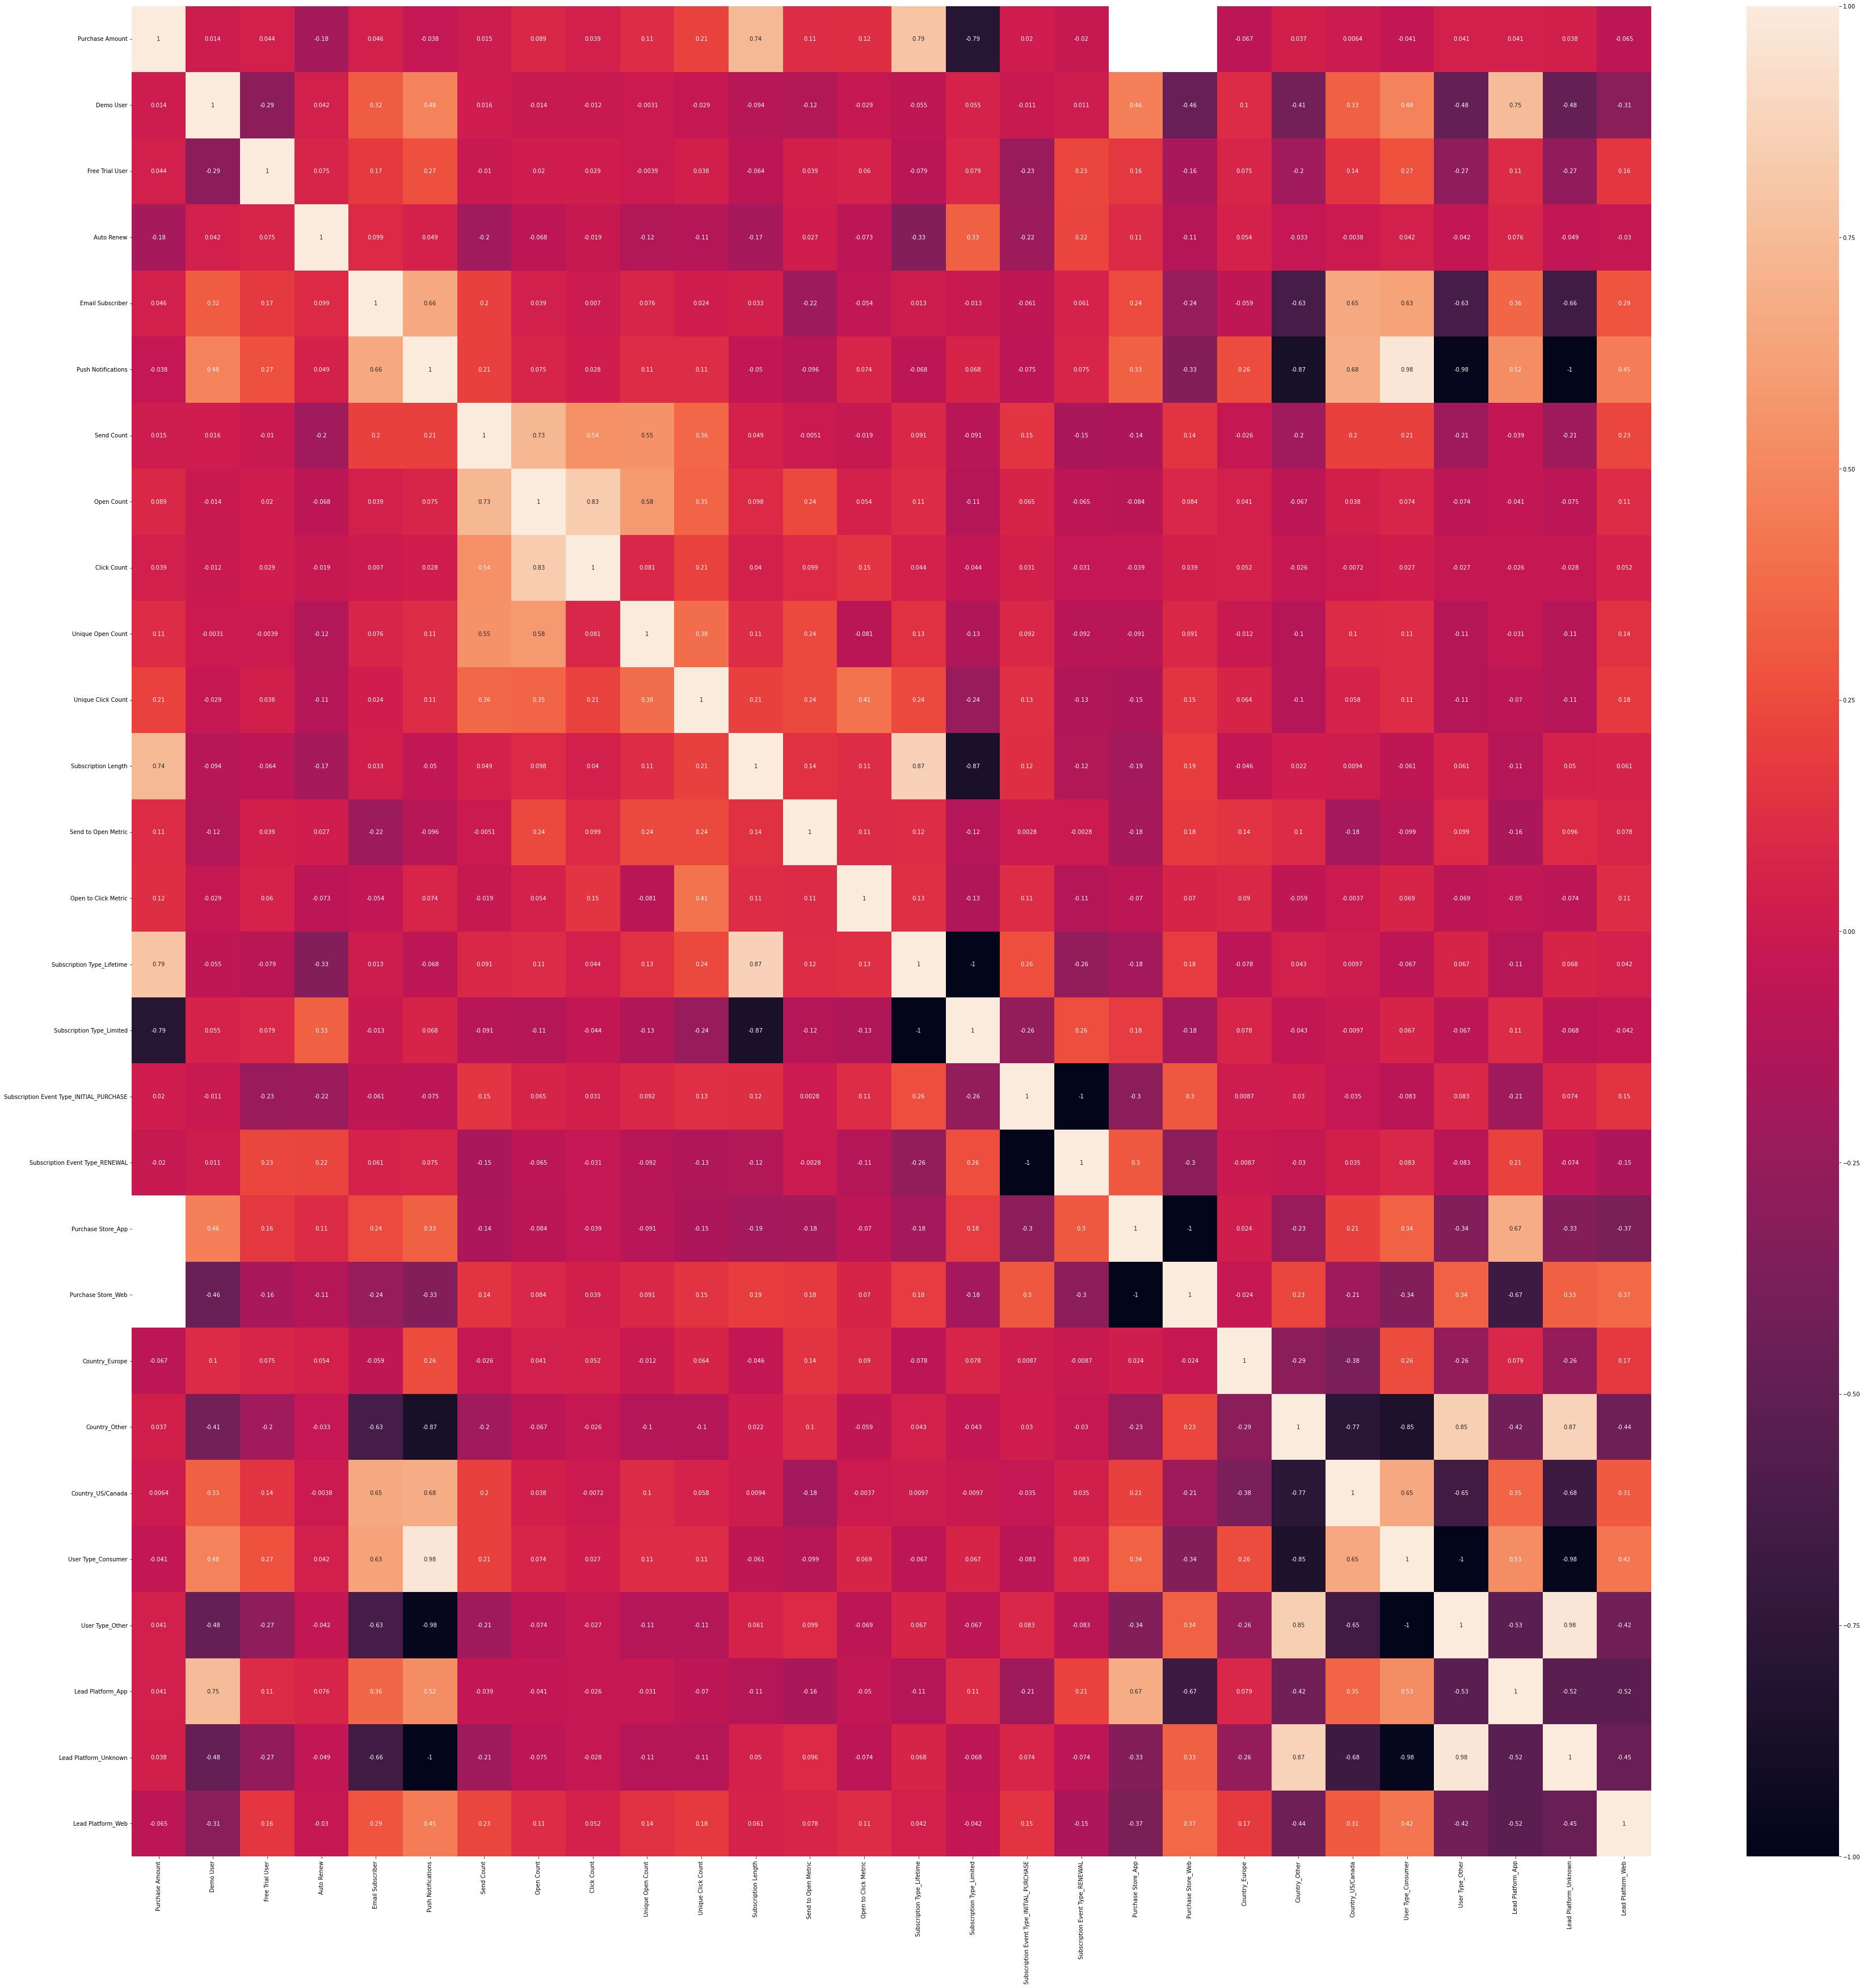

In [16]:
# New correlation matrix after making dummies variables for correlation matrix
fig = plt.figure(figsize=(60, 60)) # , dpi=480)
corr_matrix = dfDummies.corr()
#print(corr_matrix)
sn.heatmap(corr_matrix, annot=True)
plt.show()